In [32]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [33]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [34]:
print(x_train.shape)

(60000, 28, 28)


In [35]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [36]:
x_train=(x_train - 0.0)/(255.0-0.0)
x_test=(x_test-0.0)/(255.0-0.0)
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

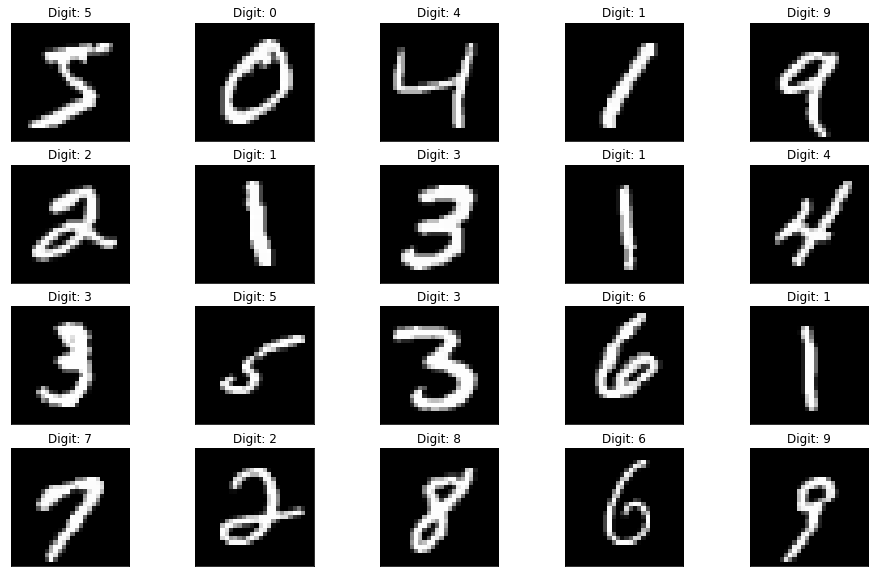

In [37]:
def plot_digit(image, digit, plt, i):
    plt.subplot(4, 5, i+1)
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.title(f"Digit: {digit}")
    plt.xticks([])
    plt.yticks([])
plt.figure(figsize=(16,10))
for i in range(20):
    plot_digit(x_train[i], y_train[i], plt, i)
plt.show()

In [38]:
x_train=x_train.reshape((x_train.shape+(1,)))
x_test=x_test.reshape((x_test.shape+(1,)))

In [39]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [40]:
# x_train=x_train/255
# x_test=x_test/255
# print("Shape of Training: ",x_train.shape)
# print("Shape of Testing: ",x_test.shape)

In [41]:
model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10, activation="softmax")
    
])
# model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(200,activation="relu"))
# model.add(Dropout(0.3))
# model.add(Dense(10,activation="softmax"))

# model.summary()

In [42]:
optimizer=SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2298 - accuracy: 0.9306
Epoch 2/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0745 - accuracy: 0.9776
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0482 - accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0260 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0144 - accuracy: 0.9957
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0101 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0080 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 29s 16m

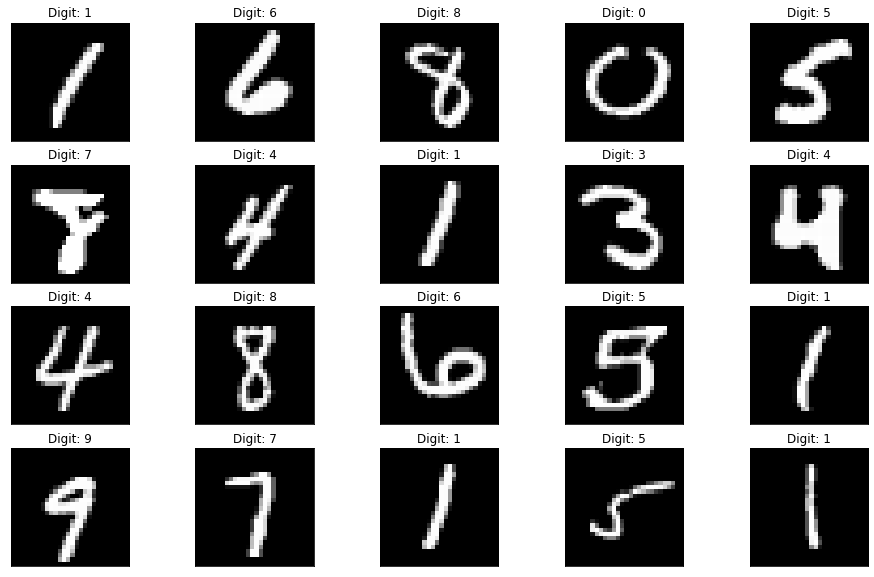

In [44]:
plt.figure(figsize=(16,10))
for i in range(20):
    image= random.choice(x_test).squeeze()
    digit=np.argmax(model.predict(image.reshape((1,28,28,1)))[0],axis=-1)
    plot_digit(image,digit,plt,i)
plt.show()

In [45]:
predictions = np.argmax(model.predict(x_test),axis=-1)
accuracy_score(y_test, predictions)

0.9858

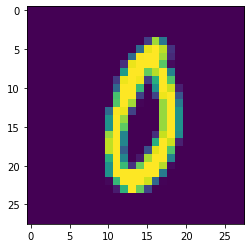

In [46]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()

In [47]:
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

Handwritten number in the image is= 0


In [48]:
score = model.evaluate(x_test,y_test,verbose=0)
print("Test loss:",score[0])
print("Test accuracy:",score[1])

Test loss: 0.048586707562208176
Test accuracy: 0.98580002784729


In [10]:
# test_loss,test_acc=model.evaluate(x_test,y_test)
# print("Loss=%.3f"%test_loss)
# print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0583 - accuracy: 0.9820
Loss=0.058
Accuracy=0.982


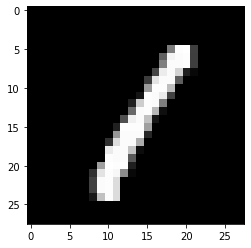

In [12]:
# image=x_train[3]
# plt.imshow(np.squeeze(image),cmap='gray')
# plt.show()

In [13]:
# image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
# predict_model=model.predict([image])

In [14]:
# print("Predicted Class:{}",format(np.argmax(predict_model)))

Predicted Class:{} 1
